In [1]:
import os
import requests

url = "https://zenodo.org/records/4629685/files/Raw_IQ_Dataset.zip?download=1"  # Replace with the actual URL
output_path = "gnss_raw_iq_dataset.zip"

# Download
response = requests.get(url)
with open(output_path, "wb") as f:
    f.write(response.content)

print("Download complete.")


Download complete.


In [2]:
import os

# Define the corrected base path
base_path = "./gnss_dataset/Raw_IQ_Dataset"

# Check if the corrected path exists
os.path.exists(base_path), os.listdir(base_path) if os.path.exists(base_path) else "Path not found"


(True, ['Training', 'Testing'])

In [3]:
import zipfile

with zipfile.ZipFile("gnss_raw_iq_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("gnss_dataset")

print("Extraction complete.")


Extraction complete.


In [4]:
import os

for root, dirs, files in os.walk("gnss_dataset"):
    print(f"Directory: {root}, Files: {len(files)}")


Directory: gnss_dataset, Files: 0
Directory: gnss_dataset/Raw_IQ_Dataset, Files: 0
Directory: gnss_dataset/Raw_IQ_Dataset/Training, Files: 0
Directory: gnss_dataset/Raw_IQ_Dataset/Training/SingleChirp, Files: 1000
Directory: gnss_dataset/Raw_IQ_Dataset/Training/NB, Files: 1000
Directory: gnss_dataset/Raw_IQ_Dataset/Training/SingleAM, Files: 1000
Directory: gnss_dataset/Raw_IQ_Dataset/Training/DME, Files: 1000
Directory: gnss_dataset/Raw_IQ_Dataset/Training/NoJam, Files: 1000
Directory: gnss_dataset/Raw_IQ_Dataset/Training/SingleFM, Files: 1000
Directory: gnss_dataset/Raw_IQ_Dataset/Testing, Files: 0
Directory: gnss_dataset/Raw_IQ_Dataset/Testing/SingleChirp, Files: 250
Directory: gnss_dataset/Raw_IQ_Dataset/Testing/NB, Files: 250
Directory: gnss_dataset/Raw_IQ_Dataset/Testing/SingleAM, Files: 250
Directory: gnss_dataset/Raw_IQ_Dataset/Testing/DME, Files: 250
Directory: gnss_dataset/Raw_IQ_Dataset/Testing/NoJam, Files: 250
Directory: gnss_dataset/Raw_IQ_Dataset/Testing/SingleFM, Files: 

In [5]:
import os

# Define the corrected base path
base_path = "./gnss_dataset/Raw_IQ_Dataset"

# Check if the corrected path exists
os.path.exists(base_path), os.listdir(base_path) if os.path.exists(base_path) else "Path not found"


(True, ['Training', 'Testing'])

In [6]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Set base dataset path
base_path = "./gnss_dataset/Raw_IQ_Dataset"

# Define class names
class_names = ["DME", "NB", "NoJam", "SingleAM", "SingleChirp", "SingleFM"]

# Define training and testing paths
train_path = os.path.join(base_path, "Training")
test_path = os.path.join(base_path, "Testing")


Training samples per class: {'DME': 1000, 'NB': 1000, 'NoJam': 1000, 'SingleAM': 1000, 'SingleChirp': 1000, 'SingleFM': 1000}
Testing samples per class: {'DME': 250, 'NB': 250, 'NoJam': 250, 'SingleAM': 250, 'SingleChirp': 250, 'SingleFM': 250}


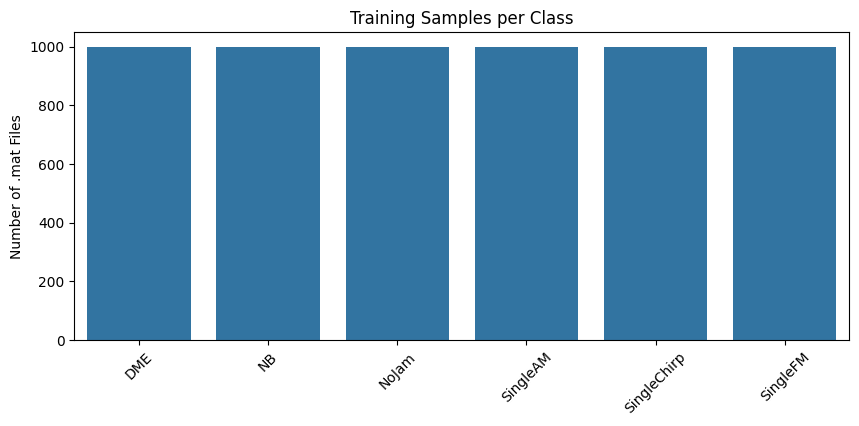

In [8]:
def count_files(directory):
    return {cls: len(os.listdir(os.path.join(directory, cls))) for cls in class_names}

train_distribution = count_files(train_path)
test_distribution = count_files(test_path)

print("Training samples per class:", train_distribution)
print("Testing samples per class:", test_distribution)

# Plot the distribution
plt.figure(figsize=(10, 4))
sns.barplot(x=list(train_distribution.keys()), y=list(train_distribution.values()))
plt.title("Training Samples per Class")
plt.ylabel("Number of .mat Files")
plt.xticks(rotation=45)
plt.show()


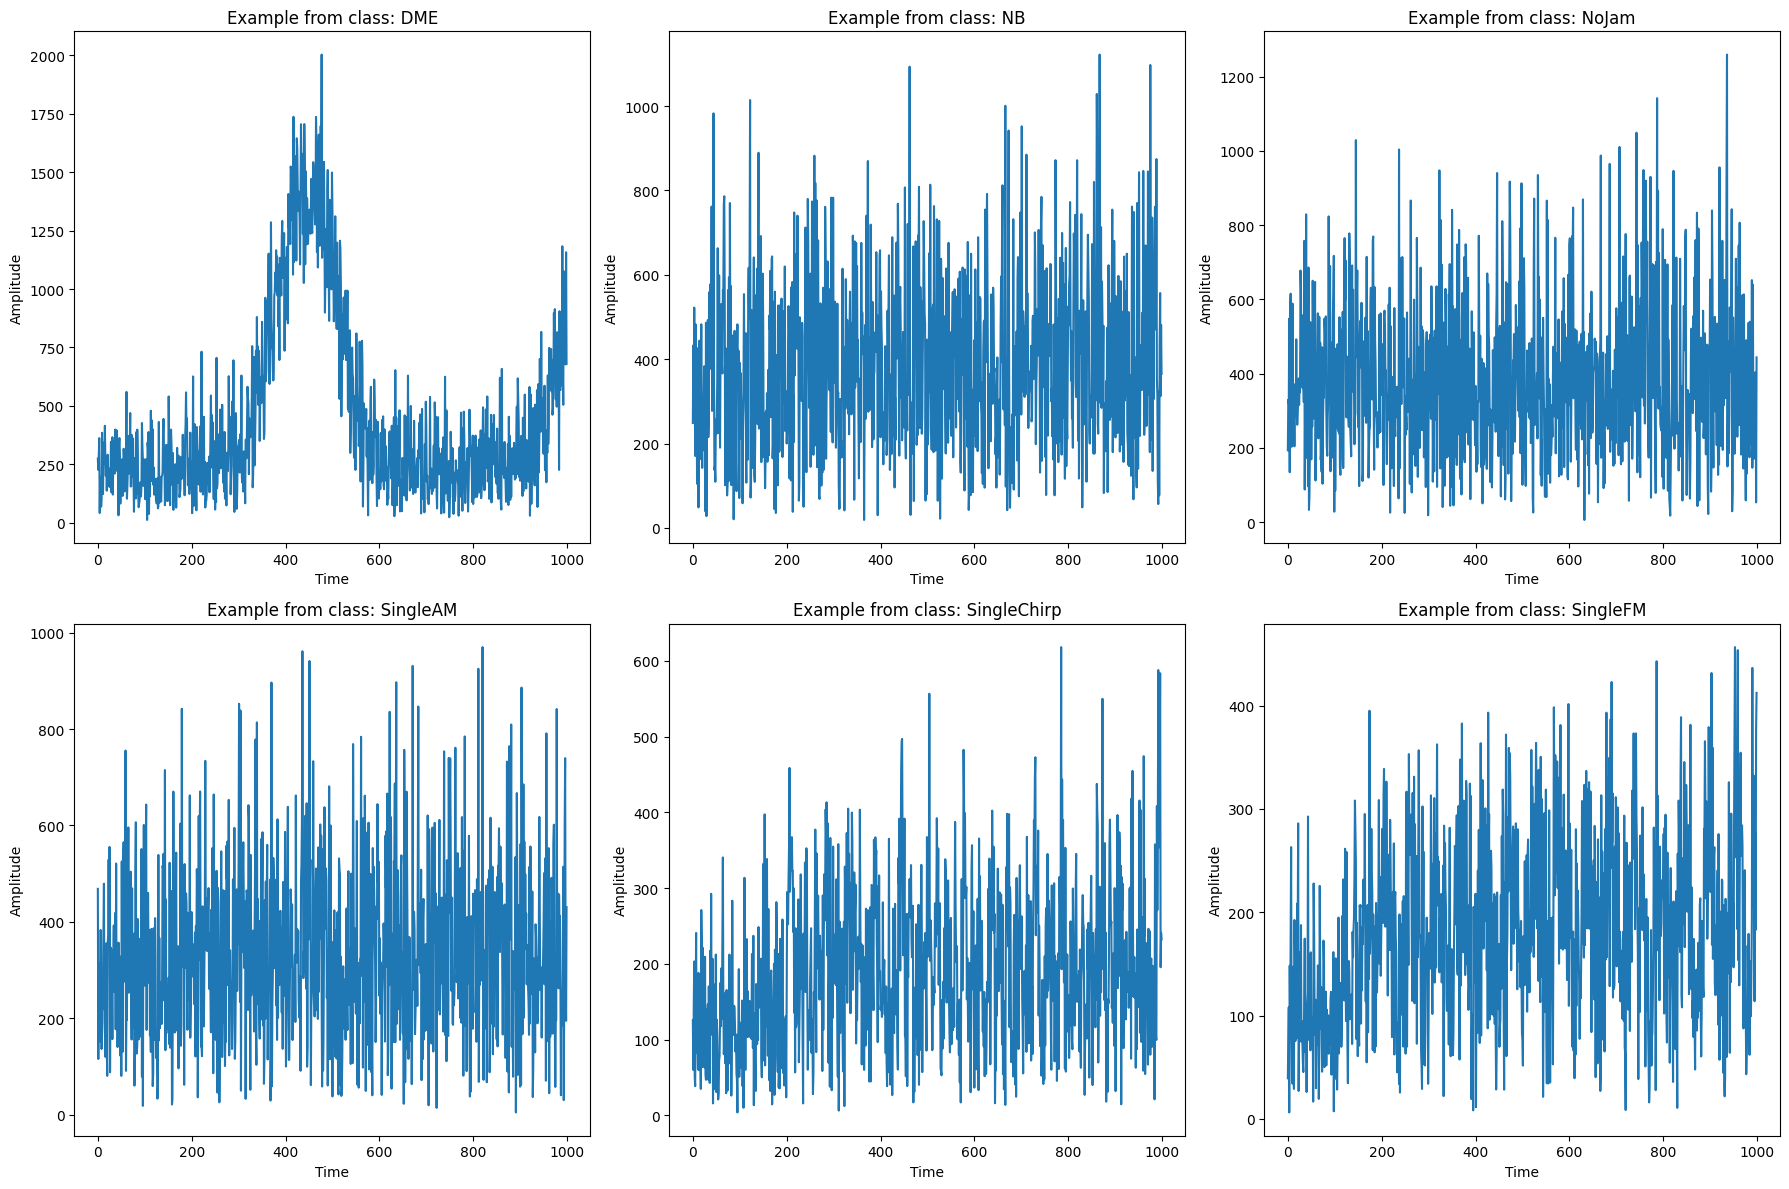

In [9]:
def plot_sample_signals(dataset_path, class_names, num_samples=1):
    plt.figure(figsize=(18, 12))
    for i, cls in enumerate(class_names):
        file_path = os.path.join(dataset_path, cls, os.listdir(os.path.join(dataset_path, cls))[0])
        data = scipy.io.loadmat(file_path)

        # Exclude metadata keys (like '__header__', '__globals__', '__version__')
        signal_keys = [k for k in data.keys() if not k.startswith("__")]

        if not signal_keys:
            print(f"No signal data found in: {file_path}")
            continue

        signal = data[signal_keys[0]].squeeze()

        # Fix for complex signals: plot magnitude
        if np.iscomplexobj(signal):
            signal = np.abs(signal)

        plt.subplot(2, 3, i + 1)
        plt.plot(signal[:1000])  # show first 1000 points
        plt.title(f"Example from class: {cls}")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

plot_sample_signals(train_path, class_names)


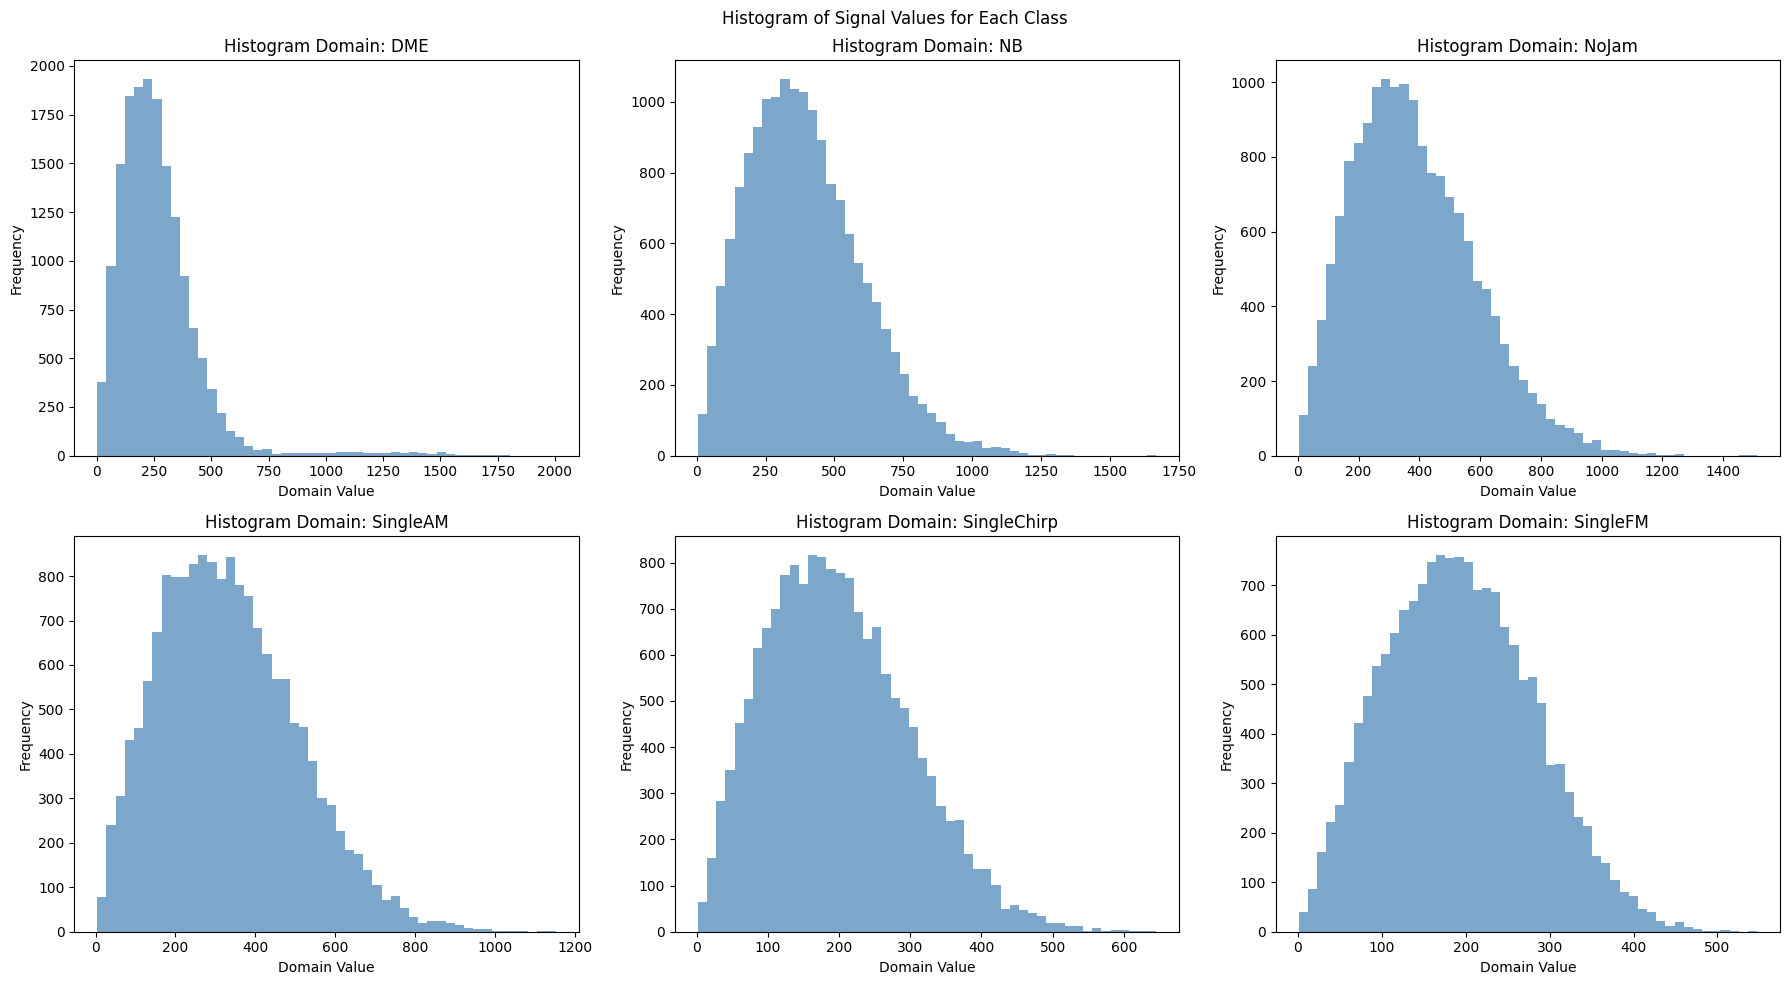

In [10]:
plt.figure(figsize=(18, 10))
for i, cls in enumerate(class_names):
    file_path = os.path.join(train_path, cls, os.listdir(os.path.join(train_path, cls))[0])
    data = scipy.io.loadmat(file_path)
    signal_key = [k for k in data if not k.startswith("__")][0]
    signal = data[signal_key].squeeze()
    if np.iscomplexobj(signal):
        signal = np.abs(signal)

    plt.subplot(2, 3, i + 1)
    plt.hist(signal, bins=50, color='steelblue', alpha=0.7)
    plt.title(f'Histogram Domain: {cls}')
    plt.xlabel('Domain Value')
    plt.ylabel('Frequency')
plt.suptitle('Histogram of Signal Values for Each Class')

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

summary_stats = []

for cls in class_names:
    file_path = os.path.join(train_path, cls, os.listdir(os.path.join(train_path, cls))[0])
    data = scipy.io.loadmat(file_path)
    signal_key = [k for k in data if not k.startswith("__")][0]
    signal = data[signal_key].squeeze()
    if np.iscomplexobj(signal):
        signal = np.abs(signal)

    stats = {
        "Class": cls,
        "Mean": np.mean(signal),
        "STD": np.std(signal),
        "Min": np.min(signal),
        "Max": np.max(signal),
        "Amplitude": np.sum(signal ** 2)
    }
    summary_stats.append(stats)

stats_df = pd.DataFrame(summary_stats)
display(stats_df)


,Class,Mean,STD,Min,Max,Amplitude
0,DME,266.594466,190.362900,2.022959,2003.633766,1.756461e+09
1,NB,394.313909,208.649903,4.178470,1669.824023,3.257531e+09
2,NoJam,384.354032,200.475304,2.414692,1511.399010,3.075848e+09
3,SingleAM,334.868609,171.736308,4.266465,1153.195922,2.318205e+09
4,SingleChirp,198.864654,100.514205,1.507360,645.971028,8.126754e+08
5,SingleFM,193.391685,87.787981,0.727689,547.223317,7.383126e+08


In [12]:
# Cell 1: بارگذاری و نمایش ساختار اول سیگنال
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import scipy.io as sio

mat = sio.loadmat('/home/nader/gnss_dataset/Raw_IQ_Dataset/Training/DME/Training_raw_5.mat')

print(mat.keys())


dict_keys(['__header__', '__version__', '__globals__', 'GNSS_plus_Jammer_awgn'])


In [15]:
print("Keys:", mat.keys())

Keys: dict_keys(['__header__', '__version__', '__globals__', 'GNSS_plus_Jammer_awgn'])


In [16]:
iq = mat['GNSS_plus_Jammer_awgn'].squeeze()

In [20]:
print(iq.shape)

(16368,)


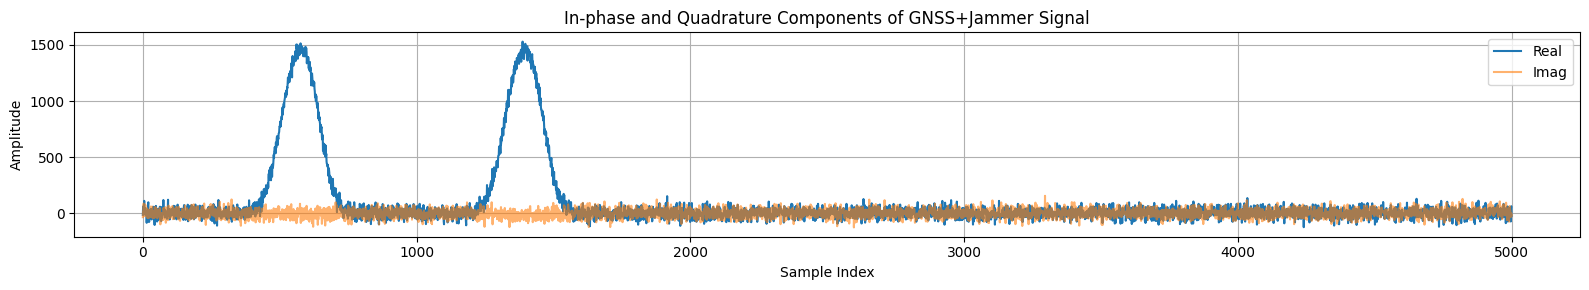

In [31]:
plt.figure(figsize=(16, 3))
plt.plot(np.real(iq[:5000]), label='Real')
plt.plot(np.imag(iq[:5000]), label='Imag', alpha=0.6)
plt.title("In-phase and Quadrature Components of GNSS+Jammer Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

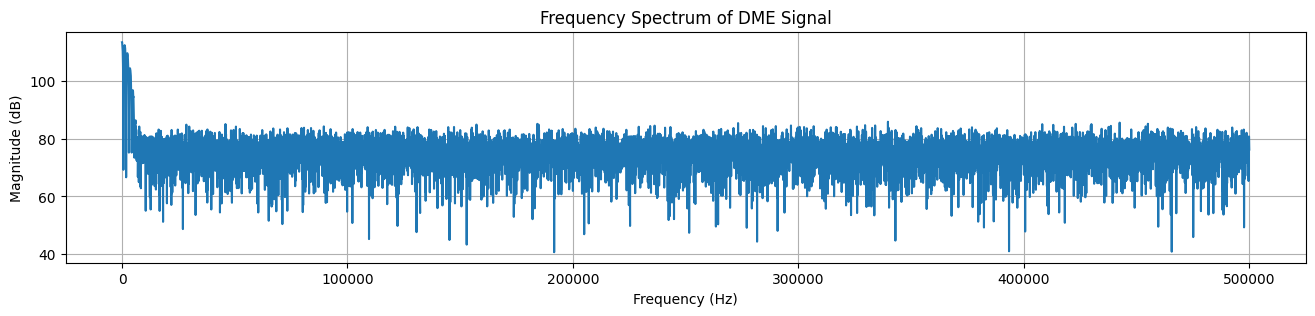

In [32]:
# Cell 2: تبدیل FFT و نمایش دامنه طیفی
from scipy.fft import fft, fftfreq

N = len(iq)
yf = fft(iq)
xf = fftfreq(N, d=1/1e6)[:N//2]  # فرض Fs = 1 MHz

plt.figure(figsize=(16,3))
plt.plot(xf, 20*np.log10(np.abs(yf[:N//2])))
plt.title("Frequency Spectrum of DME Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()


In [34]:
# Cell 3: signal preprocessing and feature extraction
import os

base_dir = 'gnss_dataset/Raw_IQ_Dataset/Training'
classes = ['DME','NB','NoJam','SingleAM','SingleChirp','SingleFM']
files = {c: [os.path.join(base_dir, c, f) for f in os.listdir(os.path.join(base_dir,c)) if f.endswith('.mat')] for c in classes}
for c in classes:
    print(c, len(files[c]), 'samples')


DME 1000 samples
NB 1000 samples
NoJam 1000 samples
SingleAM 1000 samples
SingleChirp 1000 samples
SingleFM 1000 samples


In [43]:
import os
import scipy.io as sio
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq

# Define dataset directories
base_dir = "/home/nader/gnss_dataset/Raw_IQ_Dataset"
subsets = ['Training', 'Testing']
classes = ['DME', 'NB', 'NoJam', 'SingleAM', 'SingleChirp', 'SingleFM']

# Feature extraction function
def extract_features(path, fs=1e6):  # Sampling rate assumed to be 1 MHz
    mat = sio.loadmat(path)
    iq = mat['GNSS_plus_Jammer_awgn'].squeeze()
    N = len(iq)
    yf = fft(iq)
    xf = fftfreq(N, 1/fs)[:N//2]
    amp = np.abs(yf[:N//2])
    return {
        'peak_freq': xf[np.argmax(amp)],
        'mean_power': np.mean(20 * np.log10(amp + 1e-6)),  # Avoid log(0)
        'std_power': np.std(20 * np.log10(amp + 1e-6))
    }

# Loop through both train and test data
all_features = []
for subset in subsets:
    for label in classes:
        dir_path = os.path.join(base_dir, subset, label)
        if not os.path.exists(dir_path):
            continue
        for fname in os.listdir(dir_path):
            if fname.endswith('.mat'):
                fpath = os.path.join(dir_path, fname)
                try:
                    feat = extract_features(fpath)
                    feat['class'] = label
                    feat['subset'] = subset
                    all_features.append(feat)
                except Exception as e:
                    print(f"Error processing {fpath}: {e}")

# Create DataFrame
df_feat = pd.DataFrame(all_features)

# Save to CSV
csv_output_path = "/home/nader/gnss_dataset/Raw_IQ_Dataset/gnss_features.csv"
df_feat.to_csv(csv_output_path, index=False)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Extracted GNSS Features", dataframe=df_feat)


In [41]:
print(df_feat.head())        # View the first few rows
print(df_feat.shape)         # Rows and columns count
print(df_feat.columns)       # Column names
df_feat.describe()  

     peak_freq  mean_power  std_power class    subset
0   122.189638   88.657548   5.610824   DME  Training
1  1221.896383   92.723949   5.816035   DME  Training
2     0.000000   94.511199   5.642219   DME  Training
3    61.094819   84.605835   5.907998   DME  Training
4    61.094819   77.964444   6.128852   DME  Training
(7500, 5)
Index(['peak_freq', 'mean_power', 'std_power', 'class', 'subset'], dtype='object')


,peak_freq,mean_power,std_power
count,7500.000000,7500.000000,7500.000000
mean,84060.459433,85.155926,6.086799
std,113992.507995,6.847852,0.760368
min,0.000000,71.710882,5.307765
25%,0.000000,79.655101,5.633141
50%,26270.772239,85.182315,5.791941
75%,144458.699902,91.011456,6.219471
max,499816.715543,98.942105,11.705108


In [44]:
# Cell 1: Load required packages
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
# Cell 2: Load extracted feature data
df_feat = pd.read_csv("/home/nader/gnss_dataset/Raw_IQ_Dataset/gnss_features.csv")
print(df_feat.head())


     peak_freq  mean_power  std_power class    subset
0   122.189638   88.657548   5.610824   DME  Training
1  1221.896383   92.723949   5.816035   DME  Training
2     0.000000   94.511199   5.642219   DME  Training
3    61.094819   84.605835   5.907998   DME  Training
4    61.094819   77.964444   6.128852   DME  Training


In [46]:
# Cell 3: Prepare X and y
X = df_feat[['peak_freq', 'mean_power', 'std_power']]
y = LabelEncoder().fit_transform(df_feat['class'])


In [47]:
# Cell 4: Split and standardize
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
# Cell 5: Train XGBoost classifier
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=100,
    learning_rate=0.01,
    max_depth=6,
    random_state=42
)
model.fit(X_train_scaled, y_train)


/home/nader/Desktop/ml-env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [03:26:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

Classification Report:

              precision    recall  f1-score   support

         DME       0.84      0.68      0.75       375
          NB       0.78      0.78      0.78       375
       NoJam       0.82      0.87      0.85       375
    SingleAM       0.51      0.82      0.63       375
 SingleChirp       0.66      0.76      0.71       375
    SingleFM       0.65      0.23      0.34       375

    accuracy                           0.69      2250
   macro avg       0.71      0.69      0.67      2250
weighted avg       0.71      0.69      0.67      2250



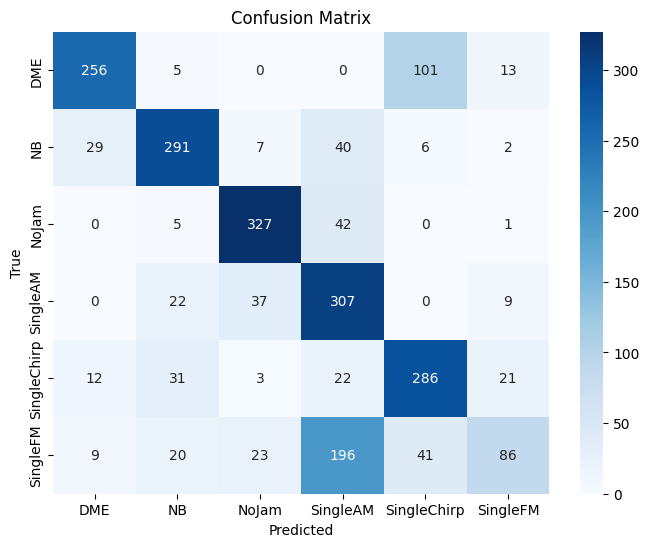

In [59]:
# Cell 6: Evaluate model
y_pred = model.predict(X_test_scaled)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=df_feat['class'].unique()))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=df_feat['class'].unique(),
            yticklabels=df_feat['class'].unique(), cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


2025-06-26 00:57:19.213340: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-26 00:57:19.224520: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-26 00:57:19.335012: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-26 00:57:19.439984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750888639.546714  561121 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750888639.57

Epoch 1/50
750/750 - 158s - 211ms/step - accuracy: 0.6188 - loss: 0.9735 - val_accuracy: 0.8440 - val_loss: 0.3850 - learning_rate: 1.0000e-04
Epoch 2/50
750/750 - 151s - 201ms/step - accuracy: 0.7772 - loss: 0.5200 - val_accuracy: 0.8647 - val_loss: 0.2791 - learning_rate: 1.0000e-04
Epoch 3/50
750/750 - 150s - 201ms/step - accuracy: 0.8280 - loss: 0.3841 - val_accuracy: 0.7693 - val_loss: 0.5268 - learning_rate: 1.0000e-04
Epoch 4/50
750/750 - 151s - 201ms/step - accuracy: 0.8687 - loss: 0.3048 - val_accuracy: 0.8040 - val_loss: 0.8553 - learning_rate: 1.0000e-04
Epoch 5/50

Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
750/750 - 154s - 205ms/step - accuracy: 0.8913 - loss: 0.2557 - val_accuracy: 0.7667 - val_loss: 1.2478 - learning_rate: 1.0000e-04
Epoch 6/50
750/750 - 170s - 227ms/step - accuracy: 0.9300 - loss: 0.1689 - val_accuracy: 0.9180 - val_loss: 0.2429 - learning_rate: 5.0000e-05
Epoch 7/50
750/750 - 159s - 212ms/step - accuracy: 0.9495 - loss:

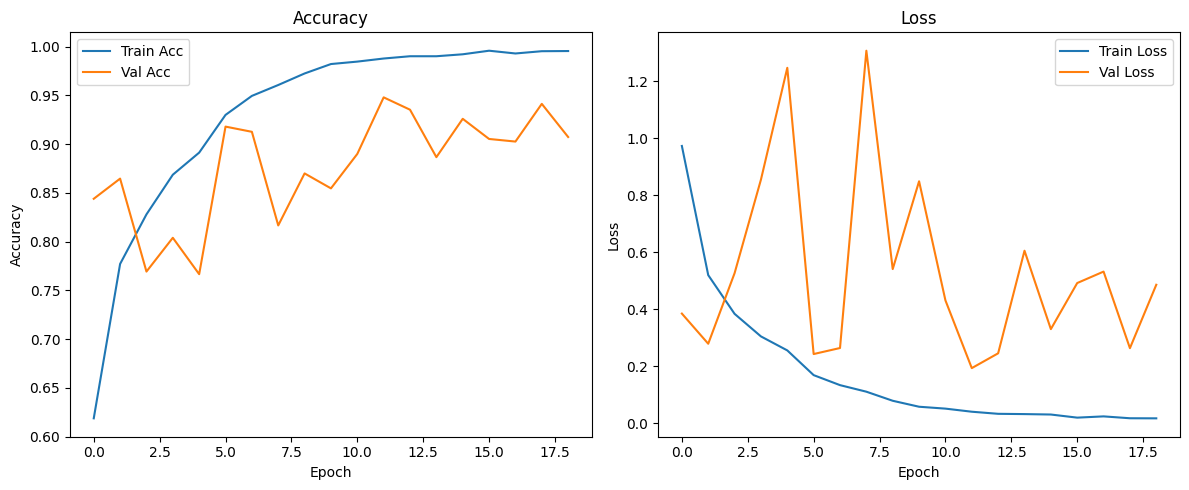

   Test Accuracy  Test Loss
0          0.948   0.193522
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step
              precision    recall  f1-score   support

         DME       1.00      1.00      1.00       250
          NB       0.97      0.91      0.94       250
       NoJam       1.00      1.00      1.00       250
    SingleAM       0.86      0.96      0.91       250
 SingleChirp       0.92      0.98      0.95       250
    SingleFM       0.95      0.84      0.89       250

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



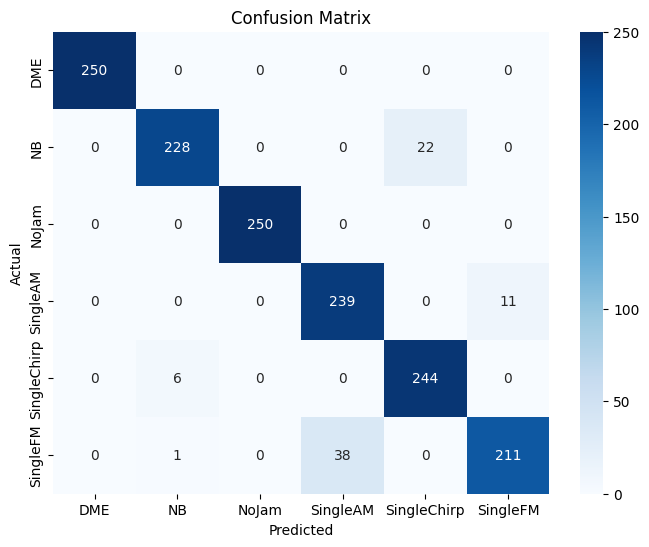

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from scipy.signal import spectrogram
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import EfficientNetB0

# Parameters
train_dir = "/home/nader/gnss_dataset/Raw_IQ_Dataset/Training"
test_dir = "/home/nader/gnss_dataset/Raw_IQ_Dataset/Testing"
classes = ['DME', 'NB', 'NoJam', 'SingleAM', 'SingleChirp', 'SingleFM']
img_size = (128, 128)

def load_and_preprocess_data(data_dir, classes, img_size=(128, 128)):
    X, y = [], []
    for cls in classes:
        folder = os.path.join(data_dir, cls)
        for file in os.listdir(folder):
            path = os.path.join(folder, file)
            try:
                mat = sio.loadmat(path)
                if 'GNSS_plus_Jammer_awgn' not in mat:
                    continue
                iq = mat['GNSS_plus_Jammer_awgn'].squeeze()
                f, t, Sxx = spectrogram(iq, fs=1e6, nperseg=256, noverlap=128)
                Sxx_log = np.log10(Sxx + 1e-10)
                Sxx_resized = cv2.resize(Sxx_log, img_size)
                X.append(Sxx_resized)
                y.append(cls)
            except Exception as e:
                print(f"Error processing {path}: {e}")
    return np.array(X), np.array(y)

# Load datasets
X_train_raw, y_train = load_and_preprocess_data(train_dir, classes, img_size)
X_test_raw, y_test = load_and_preprocess_data(test_dir, classes, img_size)

# Normalization
X_min, X_max = X_train_raw.min(), X_train_raw.max()
X_train = (X_train_raw - X_min) / (X_max - X_min)
X_test = (X_test_raw - X_min) / (X_max - X_min)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

# Labels
le = LabelEncoder()
y_train_enc = to_categorical(le.fit_transform(y_train))
y_test_enc = to_categorical(le.transform(y_test))

# CNN Model (based on the GitHub repository)
'''
def create_cnn_model(input_shape=(128,128,1), num_classes=6):
    m = models.Sequential()
    m.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))
    m.add(layers.BatchNormalization())
    m.add(layers.MaxPooling2D((2,2)))

    m.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    m.add(layers.BatchNormalization())
    m.add(layers.MaxPooling2D((2,2)))

    m.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    m.add(layers.BatchNormalization())
    m.add(layers.MaxPooling2D((2,2)))

    m.add(layers.Flatten())
    m.add(layers.Dense(128, activation='relu'))
    m.add(layers.Dropout(0.5))
    m.add(layers.Dense(64, activation='relu'))  # ✅ extra layer
    m.add(layers.Dropout(0.3))                  # ✅ extra dropout
    m.add(layers.Dense(num_classes, activation='softmax'))
    return m
'''

def create_cnn_model(input_shape=(128,128,1), num_classes=6):
    m = models.Sequential()
    m.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape))
    m.add(layers.BatchNormalization())
    m.add(layers.MaxPooling2D((2,2)))

    m.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    m.add(layers.BatchNormalization())
    m.add(layers.MaxPooling2D((2,2)))

    m.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    m.add(layers.BatchNormalization())
    m.add(layers.MaxPooling2D((2,2)))

    m.add(layers.Flatten())
    m.add(layers.Dense(128, activation='relu'))
    m.add(layers.Dropout(0.2))
    m.add(layers.Dense(64, activation='relu'))  # ✅ extra layer
    #m.add(layers.Dropout(0.2))                  # ✅ extra dropout
    m.add(layers.Dense(num_classes, activation='softmax'))
    return m


cnn_model = create_cnn_model()

# Compile
cnn_model.compile(optimizer=Nadam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-10, verbose=1)

# Train

history = cnn_model.fit(X_train, y_train_enc,
                        validation_data=(X_test, y_test_enc),
                        epochs=50,
                        batch_size=8,
                        callbacks=[early_stop, reduce_lr],
                        verbose=2)
'''

history = cnn_model.fit(
    datagen.flow(X_train, y_train_enc, batch_size=32),
    validation_data=(X_test, y_test_enc),
    epochs=50,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)
'''
# Evaluate
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test_enc, verbose=0)
results_df = pd.DataFrame({
    "Test Accuracy": [test_accuracy],
    "Test Loss": [test_loss]
})

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.tight_layout()
plt.show()


print(results_df)



y_pred = cnn_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_enc, axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=classes))

conf_mat = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix")
plt.show()
